**Stock Price Prediction: A Comparison of Models**

**Introduction:**

In this notebook, we will compare the performance of five different models for stock price prediction. We will evaluate the effectiveness of the following models: Stacked LSTM, BILSTM (Bidirectional LSTM), GRU (Gated Recurrent Unit), GARCH (Generalized Autoregressive Conditional Heteroskedasticity), and LSTM + GARCH hybrid model. The goal is to identify the model that yields the most accurate predictions for stock prices.

**Data Preparation:**

Before comparing the models, we will perform data preprocessing, including feature engineering, data normalization, and splitting the dataset into training, validation, and testing sets. This ensures that all models are trained and evaluated on the same data.

**Model 1: Stacked LSTM**

The Stacked LSTM model is a variation of the traditional LSTM model, where multiple LSTM layers are stacked on top of each other. This architecture allows for capturing more complex temporal dependencies and can potentially improve prediction accuracy.

**Model 2: BILSTM**

The BILSTM model extends the LSTM architecture by processing the input sequence in both forward and backward directions. By considering past and future information simultaneously, the BILSTM model can capture more comprehensive context and potentially improve the prediction performance.

**Model 3: GRU**

GRU (Gated Recurrent Unit) is an alternative to LSTM that also addresses the vanishing gradient problem in traditional RNNs. It simplifies the LSTM architecture by combining the forget and input gates into a single update gate, making it computationally more efficient while still capturing long-term dependencies.

**Model 4: CNN**


**Evaluation Metrics:**

To compare the performance of the models, we will use various evaluation metrics such as root mean squared error (RMSE), mean absolute error (MAE), and mean absolute percentage error (MAPE). These metrics will provide insights into the accuracy and reliability of the predicted stock prices from each model.

**Conclusion:**

After evaluating the performance of the five models, we will summarize and compare their results. We will consider factors such as prediction accuracy, computational complexity, and interpretability to identify the most suitable model for stock price prediction. The insights gained from this comparison will help in making informed decisions for stock trading, risk management, and investment strategies.

**Implementation:**

The notebook will provide step-by-step code implementation for each model, including model training, validation, and testing phases. Visualizations and performance metrics will be presented to support the model comparison and analysis.


**Note:** The code implementation and specific results for each model will be provided in separate sections within the notebook.






In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kora -q
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
sns.set_style("white")

import scipy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Set random seed for reproducibility
tf.random.set_seed(42)

In [4]:
#Read the Input file
df = pd.read_csv("/content/drive/MyDrive/Interview/datasets/BTC-USD.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
#Checking the datatypes of the columns
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
df["Date"]

0       2014-09-17
1       2014-09-18
2       2014-09-19
3       2014-09-20
4       2014-09-21
           ...    
2702    2022-02-09
2703    2022-02-10
2704    2022-02-11
2705    2022-02-12
2706    2022-02-13
Name: Date, Length: 2707, dtype: object

## Data Cleaning

Since there are empty cell with a value that doesn’t exist.The interpolate is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value.

The default function to interpolate() is using Linear method.

Linear Interpolation simply means to estimate a missing value by connecting dots in a straight line in increasing order. In short, It estimates the unknown value in the same increasing order from previous values. The default method used by Interpolation is Linear so while applying it we did not need to specify it.

In [8]:
# function to impute missing values using interpolation
def fill_missing(df):
    df['Open'] = df['Open'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Volume'] = df['Volume'].interpolate()
    print('No. of Missing values after interpolation:')
    print(df.isnull().sum())

fill_missing(df)

No. of Missing values after interpolation:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [9]:
#calculating missing values in the dataset
missing_values = df.isnull().sum()
missing_per = (missing_values/df.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True)
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table


,Total Missing Values,Missing %
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Adj Close,0,0.0
Volume,0,0.0


<ipython-input-10-000128501b26>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)


<Axes: >

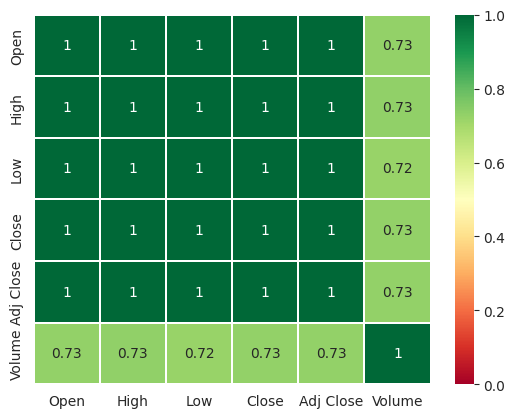

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

Convert ‘Date’ to datetime

In [11]:
# We see Date is an object, so we have to convert it to datetime
df['Date'] = df['Date'].astype('datetime64[ns]')

In [12]:
df1=df.reset_index()['Close']
df1.head()

0    457.334015
1    424.440002
2    394.795990
3    408.903992
4    398.821014
Name: Close, dtype: float64

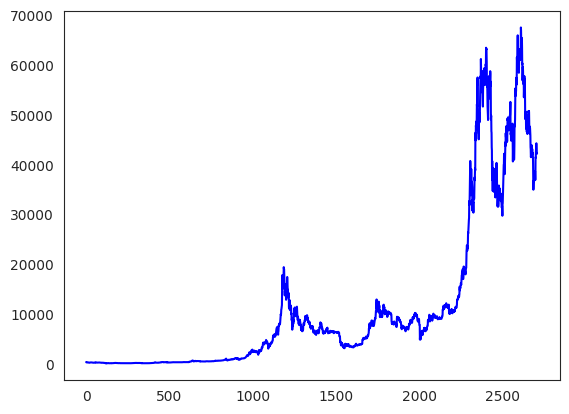

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1, color='blue')

Let's break down the code that splits the dataset into train, test, and validation sets:

* **train_size - train_data = df1[:train_size]**

  In this line, the train_data variable is assigned a subset of the df1 dataset. The subset includes the data from the beginning of df1 up to the train_size. This means that train_data contains the initial portion of the dataset, representing the train set.

* **test_data = df1[train_size:train_size+test_size]**

  Here, the test_data variable is assigned another subset of the df1 dataset. This subset includes the data starting from the index train_size and extending up to the index train_size + test_size. This portion of the dataset represents the test set.


* **val_data = df1[train_size+test_size:]**

  In this line, the val_data variable is assigned the remaining portion of the df1 dataset. It starts from the index train_size + test_size and includes all the data until the end of the dataset. This portion represents the validation set.


By splitting the dataset in this way, you are allocating a specific portion of the data to each set. The train set is typically used for training the model, the test set is used for evaluating the model's performance on unseen data, and the validation set is used for fine-tuning and optimizing the model's hyperparameters. Each set serves a distinct purpose in the model development and evaluation process.

In [14]:
# Import necessary libraries
import numpy as np

# Assuming your time series data is stored in a variable called 'df1'

# Determine the sizes of train, test, and validation sets
train_size = int(len(df1) * 0.8)  # 70% of the data for training
val_size = int(len(df1) * 0.1)   # 20% of the data for testing
test_size = len(df1) - train_size - val_size  # 10% Remaining data for validation

# Split the dataset into train, test, and validation sets
train_data = df1[:train_size]
test_data = df1[train_size:train_size+val_size]
val_data = df1[train_size+val_size:]

# Print the sizes of each set
print("Train set size:", len(train_data))
print("Validation set size:", len(test_data))
print("Test set size:", len(val_data))


Train set size: 2165
Validation set size: 270
Test set size: 272


In [15]:
train_data.head()

0    457.334015
1    424.440002
2    394.795990
3    408.903992
4    398.821014
Name: Close, dtype: float64

In [16]:
test_data.head()

2165    11592.489258
2166    11681.825195
2167    11664.847656
2168    11774.595703
2169    11366.134766
Name: Close, dtype: float64

In [17]:
val_data.head()

2435    42909.402344
2436    37002.441406
2437    40782.738281
2438    37304.691406
2439    37536.632813
Name: Close, dtype: float64

## MinMax Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_data_scaled=scaler.fit_transform(np.array(train_data).reshape(-1,1))
val_data_scaled=scaler.fit_transform(np.array(val_data).reshape(-1,1))
test_data_scaled=scaler.fit_transform(np.array(test_data).reshape(-1,1))

### Create Dataset
We have a timeseries dataset representing closing prices. The dataset consists of the following data points:

it is on the closing price
timeseries dataset --> Train - 120,130,145,134,150,160    
                       Test  - 160,190,154,180

Train - 120,130,145,134,150,160
timestamps =3



Timestamp  |  f1  |  f2  |  f3  |  Output
----------------------------------------
     1     |  120 |  130 |  145 |   134
     2     |  130 |  145 |  150 |   160







Test  - 160,190,154,180

Timestamp  |  f1  |  f2  |  f3  |  Output
----------------------------------------
     1     |  160 |  190 |  154 |   180


### Sliding window Approach

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data_scaled, time_step)
X_val, yval = create_dataset(val_data_scaled, time_step)
X_test, ytest = create_dataset(test_data_scaled, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(2064, 100)
(2064,)


(None, None)

In [22]:
print(X_val.shape), print(yval.shape)

(171, 100)
(171,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(169, 100)
(169,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('X_test.shape: ', X_val.shape)

X_train.shape:  (2064, 100, 1)
X_test.shape:  (169, 100, 1)
X_test.shape:  (171, 100, 1)


In [25]:
# Reshape y_train for LSTM input
y_train = np.reshape(y_train, (y_train.shape[0],))

# Reshape y_val for LSTM input
y_val = np.reshape(yval, (yval.shape[0],))

# Reshape y_test for LSTM input
y_test = np.reshape(ytest, (ytest.shape[0],))


# Print the shape of y_train after reshaping
print(y_train.shape)
# Print the shape of y_val after reshaping
print(yval.shape)
# Print the shape of y_test after reshaping
print(ytest.shape)


(2064,)
(171,)
(169,)


In this code snippet, we are reshaping the input data to have the required shape for training an LSTM model. The input data is typically in the form of a 2D array, where each row represents a sample or observation, and each column represents a feature.

The reshaping is done using the reshape function from NumPy. Here's how the reshaping works:

* **X_train** is the training data that we want to reshape. It is assumed to have the shape **(samples, time steps, features)**, where:
    * **samples** refers to the number of data points or observations in the training set.
    * **time steps** refers to the number of time steps or previous data points considered as input features.
    * **features** refers to the number of features or input variables in the dataset.

By using **X_train.shape[0]**, we are accessing the first dimension of **X_train**, which represents the number of samples in the training set. Similarly, X_train.shape[1] refers to the second dimension, which represents the number of time steps or input features.

* **X_train.reshape(X_train.shape[0], X_train.shape[1], 1) **reshapes **X_train** to have the shape (samples, time steps, 1). The 1 in the reshape function indicates that we are adding an additional dimension for the features.
The same reshaping is performed on the X_test dataset as well.

Reshaping the input data in this manner is required for feeding the data into an LSTM model, as LSTMs expect a 3D input shape with dimensions representing the number of samples, time steps, and features. This reshaping allows the LSTM model to effectively learn and process sequential data over time.

In [26]:
def create_model(layer):
    model = Sequential()
    model.add(layer(50, return_sequences=True, input_shape=(100, 1)))
    model.add(layer(50, return_sequences=True))
    model.add(layer(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

### Stacked LSTM Model

In [27]:
# Create the LSTM model
model_lstm = create_model(LSTM)
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
# shuffle = False because the order of the data matters
# Fit the data to the model
model_LSTM=model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, verbose=1,callbacks=[early_stop],shuffle=False)


Epoch 1/100
33/33 [==============================] - 15s 260ms/step - loss: 0.0148 - val_loss: 0.0197
Epoch 2/100
33/33 [==============================] - 8s 230ms/step - loss: 0.0077 - val_loss: 0.0154
Epoch 3/100
33/33 [==============================] - 7s 217ms/step - loss: 0.0036 - val_loss: 0.0193
Epoch 4/100
33/33 [==============================] - 8s 237ms/step - loss: 0.0036 - val_loss: 0.0178
Epoch 5/100
33/33 [==============================] - 7s 199ms/step - loss: 0.0051 - val_loss: 0.0198
Epoch 6/100
33/33 [==============================] - 8s 253ms/step - loss: 0.0147 - val_loss: 0.0211
Epoch 7/100
33/33 [==============================] - 6s 190ms/step - loss: 0.0216 - val_loss: 0.0242
Epoch 8/100
33/33 [==============================] - 9s 264ms/step - loss: 0.0176 - val_loss: 0.0430
Epoch 9/100
33/33 [==============================] - 6s 192ms/step - loss: 0.0044 - val_loss: 0.0246
Epoch 10/100
33/33 [==============================] - 9s 264ms/step - loss: 0.0069 - val_l

### BILSTM Model

In [28]:
def create_model_bilstm():
    model = Sequential()
    model.add(Bidirectional(LSTM(50, return_sequences=True, input_shape=(100, 1))))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


# Create the BiLSTM model
model_Bilstm = create_model_bilstm()

# Fit the data to the model
model_BILSTM=model_Bilstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, verbose=1,callbacks=[early_stop],shuffle=False)


Epoch 1/100
33/33 [==============================] - 21s 366ms/step - loss: 0.0113 - val_loss: 0.0198
Epoch 2/100
33/33 [==============================] - 10s 321ms/step - loss: 0.0076 - val_loss: 0.0173
Epoch 3/100
33/33 [==============================] - 8s 239ms/step - loss: 0.0060 - val_loss: 0.0144
Epoch 4/100
33/33 [==============================] - 10s 319ms/step - loss: 0.0171 - val_loss: 0.0363
Epoch 5/100
33/33 [==============================] - 9s 277ms/step - loss: 0.0088 - val_loss: 0.0218
Epoch 6/100
33/33 [==============================] - 9s 280ms/step - loss: 0.0059 - val_loss: 0.0250
Epoch 7/100
33/33 [==============================] - 11s 324ms/step - loss: 0.0027 - val_loss: 0.0151
Epoch 8/100
33/33 [==============================] - 8s 243ms/step - loss: 0.0012 - val_loss: 0.0088
Epoch 9/100
33/33 [==============================] - 11s 321ms/step - loss: 9.1918e-04 - val_loss: 0.0066
Epoch 10/100
33/33 [==============================] - 9s 281ms/step - loss: 8.3457

### GRU Model

In [29]:
from keras.layers import GRU

# Create the LSTM model
model_gru = create_model(GRU)

# Fit the data to the model
model_GRU=model_gru.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, verbose=1,callbacks=[early_stop],shuffle=False)

Epoch 1/100
33/33 [==============================] - 16s 234ms/step - loss: 0.0140 - val_loss: 0.0228
Epoch 2/100
33/33 [==============================] - 9s 272ms/step - loss: 0.0079 - val_loss: 0.0149
Epoch 3/100
33/33 [==============================] - 7s 201ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 4/100
33/33 [==============================] - 9s 271ms/step - loss: 8.1549e-04 - val_loss: 0.0058
Epoch 5/100
33/33 [==============================] - 7s 200ms/step - loss: 9.5378e-04 - val_loss: 0.0057
Epoch 6/100
33/33 [==============================] - 9s 274ms/step - loss: 8.8934e-04 - val_loss: 0.0052
Epoch 7/100
33/33 [==============================] - 7s 198ms/step - loss: 9.2890e-04 - val_loss: 0.0052
Epoch 8/100
33/33 [==============================] - 9s 272ms/step - loss: 9.1441e-04 - val_loss: 0.0048
Epoch 9/100
33/33 [==============================] - 6s 197ms/step - loss: 9.9380e-04 - val_loss: 0.0050
Epoch 10/100
33/33 [==============================] - 9s 261ms/ste

In [31]:
def evaluate_model(model, X_train, y_train, X_test, y_test, scaler):
    # Make predictions on training and testing data
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Reshape y_train and y_test to have a 2D shape: (samples, 1)
    y_train = np.reshape(y_train, (-1, 1))
    y_test = np.reshape(y_test, (-1, 1))

    # Transform predictions and actual values back to original form
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    y_train = scaler.inverse_transform(y_train)
    y_test = scaler.inverse_transform(y_test)
    return y_train, train_predict,y_test,test_predict



In [34]:
y_train_lstm, train_predict_lstm,y_test_lstm,test_predict_lstm = evaluate_model(model_lstm, X_train, y_train, X_test, ytest, scaler)

6/6 [==============================] - 0s 39ms/step


In [35]:
y_train_bilstm, train_predict_bilstm,y_test_bilstm,test_predict_bilstm = evaluate_model(model_Bilstm, X_train, y_train, X_test, ytest, scaler)

6/6 [==============================] - 0s 45ms/step


In [36]:
y_train_gru, train_predict_gru,y_test_gru,test_predict_gru = evaluate_model(model_gru, X_train, y_train, X_test, ytest, scaler)

6/6 [==============================] - 0s 57ms/step


In [ ]:
# y_train_cnn, train_predict_cnn,y_test_cnn,test_predict_cnn= evaluate_model(model_CNN, X_train, y_train, X_test, ytest, scaler)

In [37]:
import math
from sklearn.metrics import mean_squared_error

def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse

In [39]:
rmse_train_lstm = calculate_rmse(y_train_lstm, train_predict_lstm)
print("LSTM Training RMSE:", rmse_train_lstm)
rmse_test_lstm = calculate_rmse(y_test_lstm, test_predict_lstm)
print("LSTM Testing RMSE:", rmse_test_lstm)
print()

rmse_train_bilstm = calculate_rmse(y_train_bilstm, train_predict_bilstm)
print("BILSTM Training RMSE:", rmse_train_bilstm)
rmse_test_bilstm = calculate_rmse(y_test_bilstm, test_predict_bilstm)
print("BILSTM Testing RMSE:", rmse_test_bilstm)
print()

rmse_train_gru = calculate_rmse(y_train_gru, train_predict_gru)
print("GRU Training RMSE:", rmse_train_gru)
rmse_test_gru = calculate_rmse(y_test_gru, test_predict_gru)
print("GRU Testing RMSE:", rmse_test_gru)
print()

# rmse_train_lstm = calculate_rmse(y_train_cnn, train_predict_cnn)
# print("CNN Training RMSE:", rmse_train_lstm)
# rmse_test_CNN = calculate_rmse(y_test_cnn, test_predict_cnn)
# print("CNN Testing RMSE:", rmse_test_CNN)
print()

LSTM Training RMSE: 2161.3683389848475
LSTM Testing RMSE: 7652.943663909193

BILSTM Training RMSE: 1792.6263083572776
BILSTM Testing RMSE: 4629.100005798574

GRU Training RMSE: 1245.5466635584996
GRU Testing RMSE: 2044.3677742509901




In [40]:
import matplotlib.pyplot as plt

def plot_predictions(model_name,y_true, y_pred):
    plt.plot(y_true, color='black', label='Actual Stock Price')
    plt.plot(y_pred, color='green', label='Predicted Stock Price')
    plt.title(str(model_name) + 'Training Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

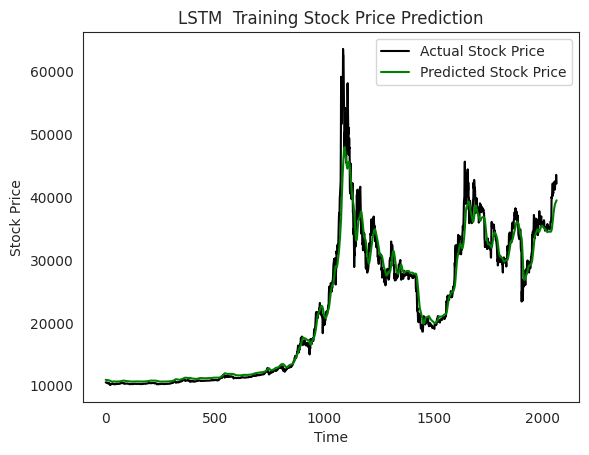

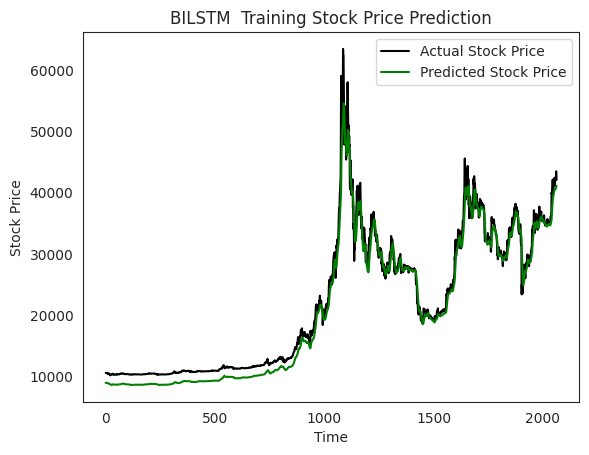

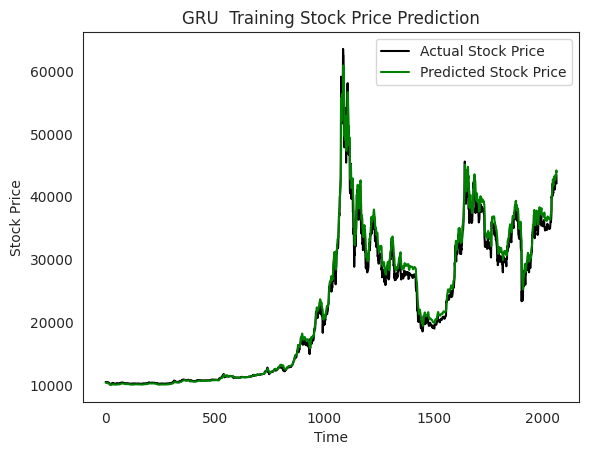

In [42]:
plot_predictions('LSTM  ',y_train_lstm, train_predict_lstm)  # For training data
plot_predictions('BILSTM  ',y_train_bilstm, train_predict_bilstm)    # For training data

plot_predictions('GRU  ',y_train_gru, train_predict_gru)  # For training data
# plot_predictions('CNN  ',y_train_cnn, train_predict_cnn)    # For training data

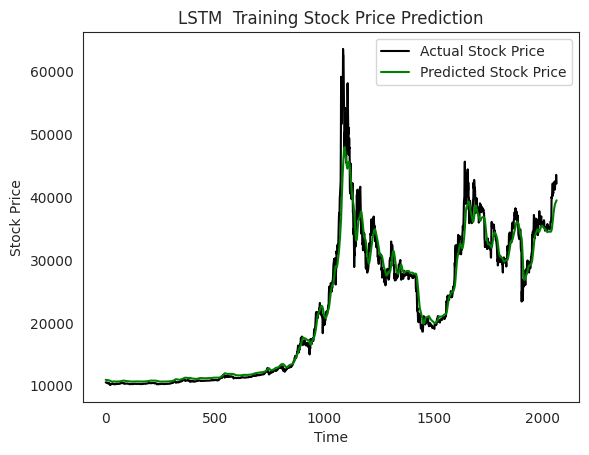

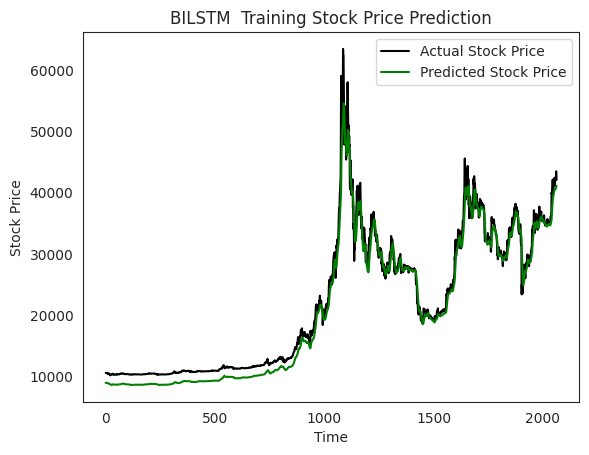

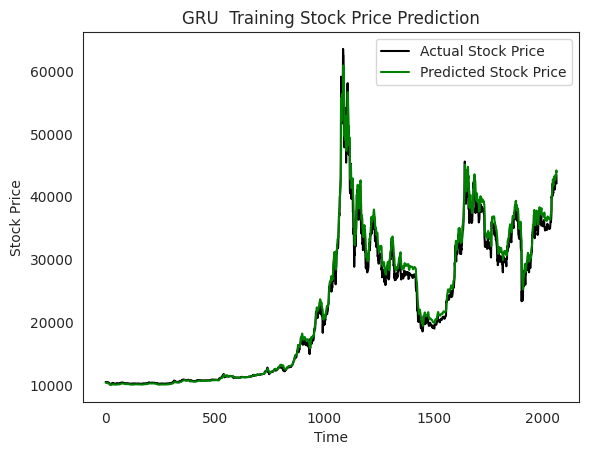

In [41]:
plot_predictions('LSTM  ',y_train_lstm, train_predict_lstm)  # For testing data
plot_predictions('BILSTM  ',y_train_bilstm, train_predict_bilstm)    # For testing data

plot_predictions('GRU  ',y_train_gru, train_predict_gru)  # For testing data
# plot_predictions('CNN     ',y_train_cnn, train_predict_cnn)    # For testing data

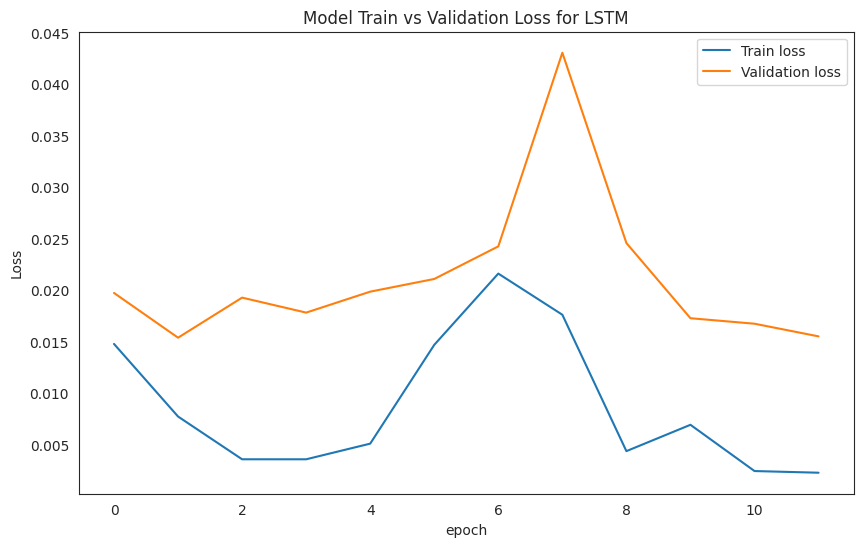

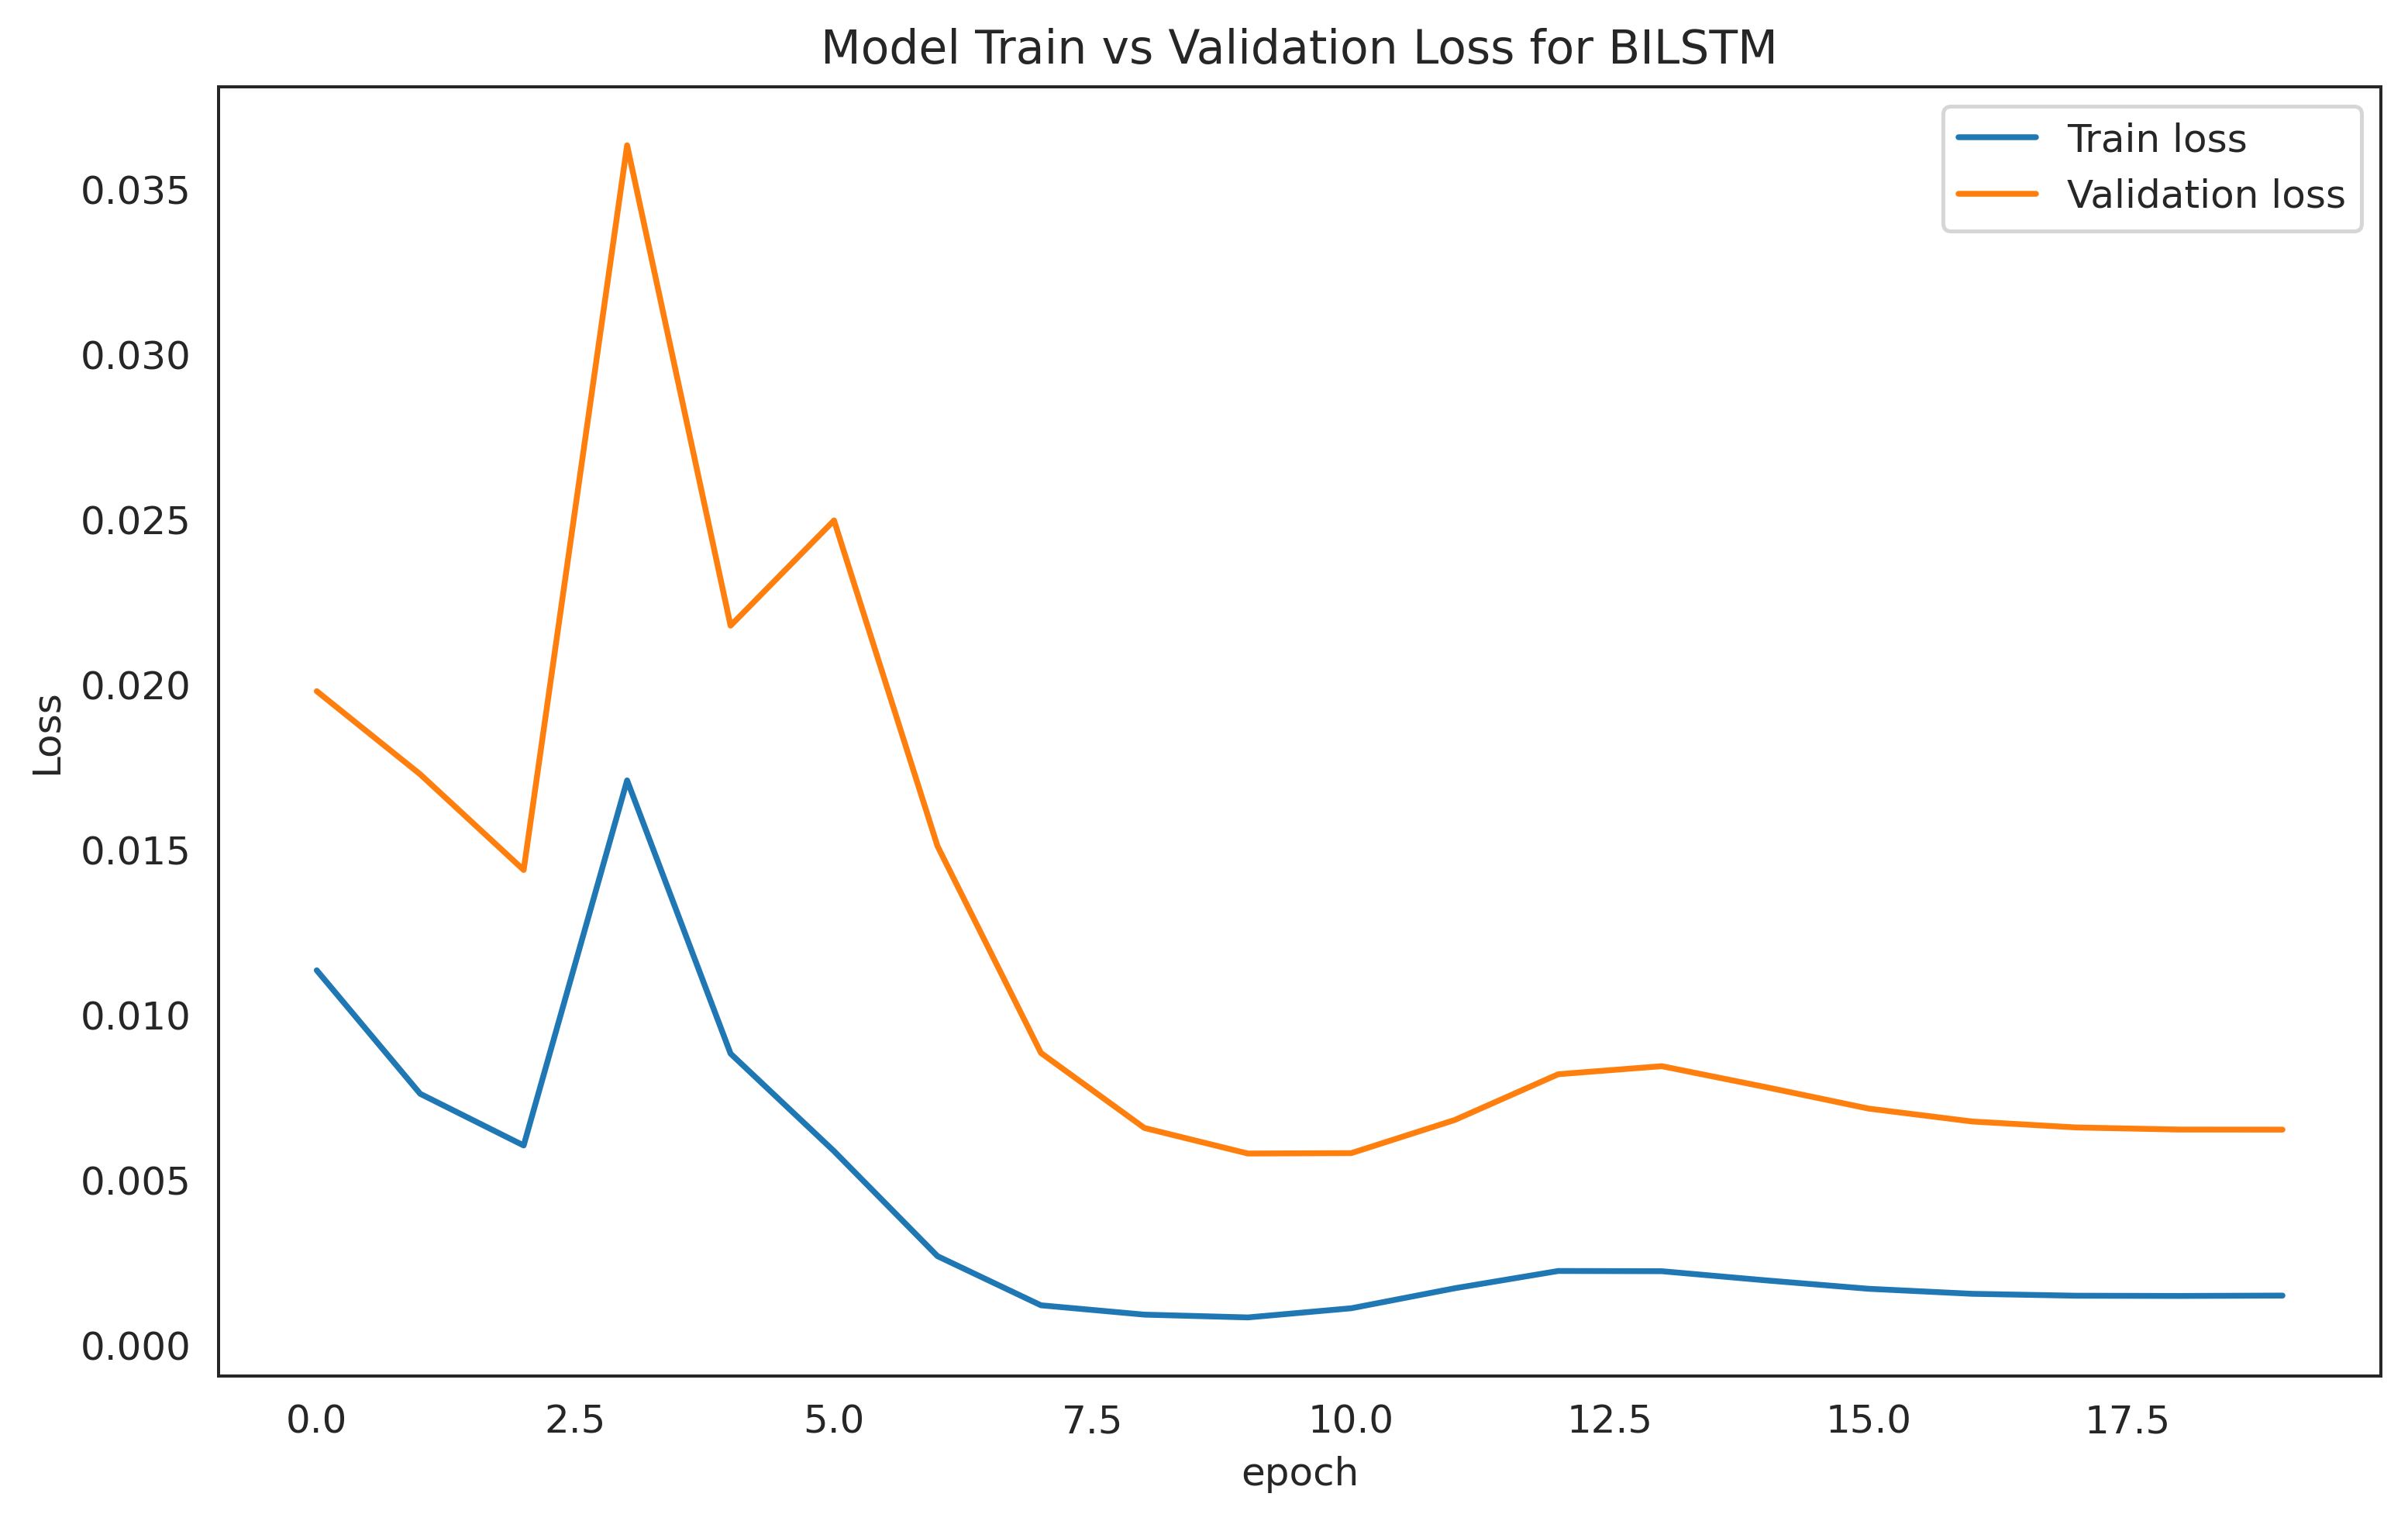

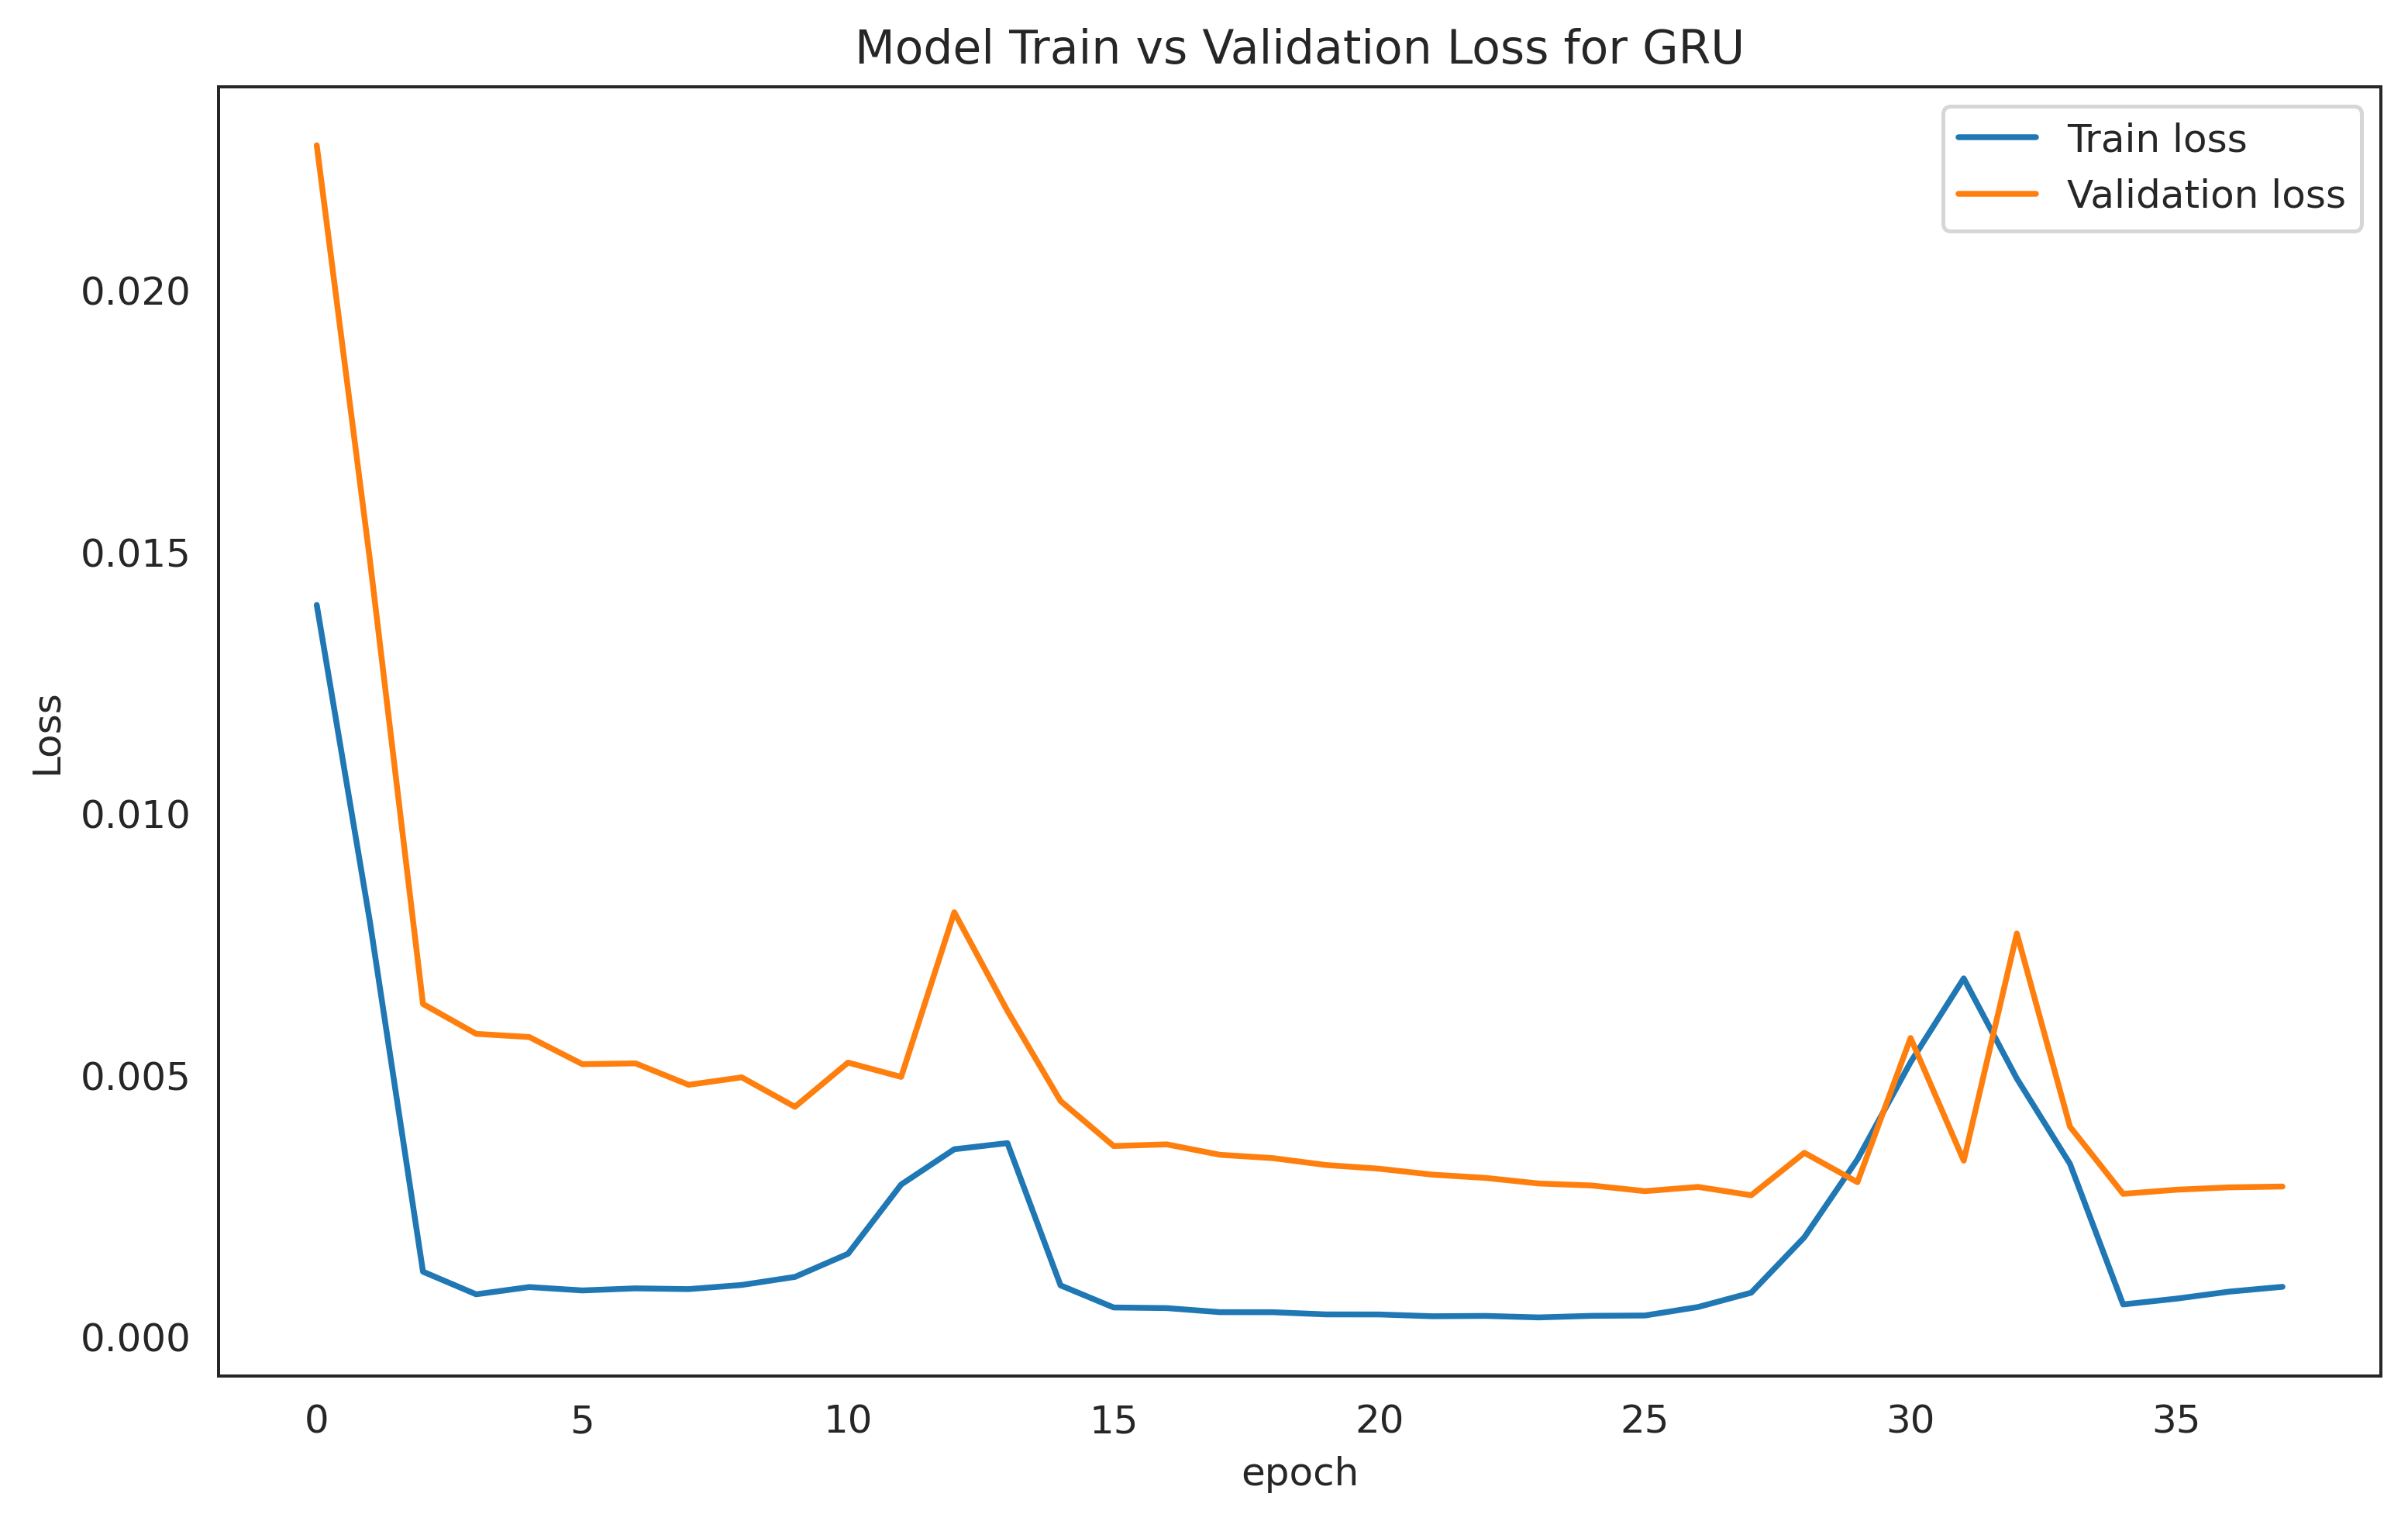

In [43]:
#Plot train and validation loss
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.rcParams['figure.dpi'] = 360
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')

plot_loss (model_LSTM, 'LSTM')
plot_loss (model_BILSTM, 'BILSTM')
plot_loss (model_GRU, 'GRU')
# plot_loss (model_CNN, 'CNN')